# Class 03 Pandas

## 匯入套件

In [47]:
import pandas as pd

## 讀取資料檔案

In [48]:
from sklearn.datasets import load_boston

In [62]:
raw = load_boston()
raw.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [64]:
X = raw.data
y = raw.target
data_df = pd.DataFrame(data=X, columns=raw.feature_names)
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 資料描述

In [65]:
data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [66]:
data_df.iloc[1:10, 5] = np.nan
data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,NaN,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,NaN,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,NaN,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,NaN,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,NaN,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,NaN,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,NaN,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,NaN,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,NaN,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


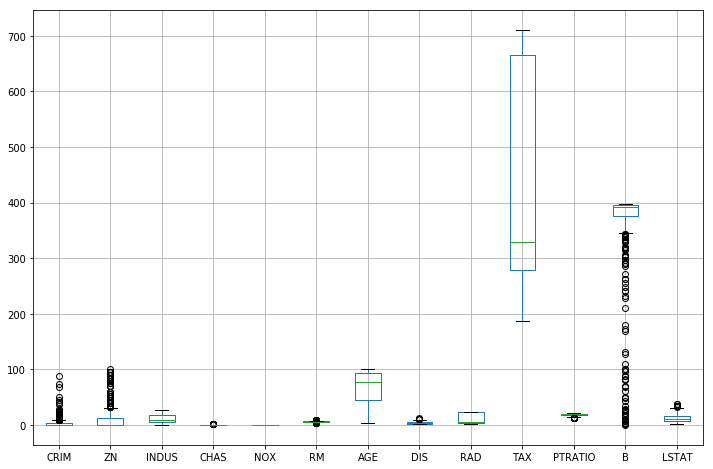

In [67]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
data_df.boxplot()
plt.show()

In [68]:
data_df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [85]:
data_another = data_df.copy()
display(data_another.dropna(axis=1, inplace=False).head())
display(data_another.dropna(axis=0, inplace=False).head())

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26


In [87]:
data_another['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [88]:
data_another['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [94]:
data_group = data_another.groupby(['RAD', 'ZN'])
data_group.mean()

CRIM      INDUS      CHAS       NOX        RM        AGE  \
RAD  ZN                                                                     
1.0  0.0     0.058440  10.256667  0.000000  0.563833  6.508833  77.766667   
     18.0    0.006320   2.310000  0.000000  0.538000  6.575000  65.200000   
     35.0    0.032633   4.546667  0.000000  0.439267  6.326000  33.666667   
     40.0    0.045550   1.250000  0.000000  0.429000  6.714500  39.450000   
     55.0    0.010960   2.250000  0.000000  0.389000  6.453000  31.900000   
     60.0    0.018130   2.930000  0.000000  0.401000  6.702000  14.350000   
     80.0    0.034440   3.013333  0.000000  0.389667  6.071333  27.533333   
     90.0    0.012035   2.090000  0.500000  0.400500  7.505500  22.800000   
2.0  0.0     0.099868  12.321111  0.000000  0.510333  6.510625  75.316667   
     80.0    0.041483   1.520000  0.000000  0.404000  7.222667  36.333333   
     82.5    0.028110   2.030000  0.000000  0.415000  6.886000  27.050000   
     85.0    0.020550   0.740000  0.000000  0.410000  6.383000  35.700000   
3.0  0.0     0.102010   4.428846  0.000000  0.461154  6.303478  55.203846   
     17.5    0.019510   1.380000  0.000000  0.416100  7.104000  59.500000   
     20.0    0.177680   6.960000  0.400000  0.464000  6.449000  46.080000   
     75.0    0.024940   3.300000  0.000000  0.422000  6.502333  28.400000   
     90.0    0.015380   3.750000  0.000000  0.394000  7.454000  34.200000   
     95.0    0.024640   1.470000  0.000000  0.403000  7.055000  14.600000   
4.0  0.0     0.538553  13.038701  0.064935  0.537208  5.975377  72.012987   
     12.5    0.107197   6.070000  0.000000  0.409000  5.785667  30.400000   
     21.0    0.058877   5.640000  0.000000  0.439000  6.146750  37.800000   
     25.0    0.039462   4.860000  0.000000  0.426000  6.453750  45.700000   
     28.0    0.037907  15.040000  0.000000  0.464000  6.300667  53.266667   
     40.0    0.079644   6.410000  0.600000  0.447000  6.837400  36.880000   
     60.0    0.075970   1.690000  0.000000  0.411000  6.231500  27.200000   
     80.0    0.045342   3.097778  0.000000  0.412444  6.536111  25.666667   
     85.0    0.018700   4.150000  0.000000  0.429000  6.516000  27.700000   
     95.0    0.027595   2.680000  0.000000  0.416100  7.943500  32.550000   
5.0  0.0     0.888900  12.395513  0.128205  0.597154  6.140885  73.864103   
     12.5    0.150037   7.870000  0.000000  0.524000  6.091667  80.685714   
     20.0    0.494504   3.810000  0.062500  0.586975  7.382437  74.143750   
     45.0    0.089112   3.440000  0.000000  0.437000  6.898500  31.283333   
     55.0    0.027960   3.780000  0.000000  0.484000  6.785000  42.250000   
     70.0    0.054813   2.240000  0.000000  0.400000  6.752333  25.833333   
     90.0    0.015100   1.620000  0.000000  0.406500  6.988500  29.000000   
     100.0   0.014320   1.320000  0.000000  0.411000  6.816000  40.500000   
6.0  0.0     0.185234   9.859412  0.000000  0.564882  5.929647  71.947059   
     30.0    0.104140   4.930000  0.000000  0.428000  6.471667  40.133333   
     52.5    0.042527   5.320000  0.000000  0.405000  6.363000  33.266667   
7.0  22.0    0.209447   5.860000  0.000000  0.431000  6.482400  36.450000   
     33.0    0.058572   2.180000  0.000000  0.472000  7.030250  60.350000   
     34.0    0.076010   6.090000  0.000000  0.433000  6.689000  25.500000   
8.0  0.0     0.449906   6.200000  0.277778  0.505667  7.212333  70.511111   
     25.0    0.135922   5.130000  0.000000  0.453000  6.166167  57.866667   
24.0 0.0    12.759291  18.100000  0.060606  0.672417  6.022152  89.805303   

                  DIS         TAX    PTRATIO           B      LSTAT  
RAD  ZN                                                              
1.0  0.0     3.015733  297.833333  20.150000  394.350000   7.900000  
     18.0    4.090000  296.000000  15.300000  396.900000   4.980000  
     35.0    6.773100  297.333333  16.433333  383.670000   8.583333  
     40.0    8.792100  335.000000  19.700000  3

In [95]:
data_another.groupby(['RAD'])['ZN'].value_counts()

RAD   ZN   
1.0   0.0        6
      35.0       3
      80.0       3
      40.0       2
      60.0       2
      90.0       2
      18.0       1
      55.0       1
2.0   0.0       18
      80.0       3
      82.5       2
      85.0       1
3.0   0.0       26
      20.0       5
      75.0       3
      95.0       2
      17.5       1
      90.0       1
4.0   0.0       77
      80.0       9
      40.0       5
      21.0       4
      25.0       4
      12.5       3
      28.0       3
      60.0       2
      95.0       2
      85.0       1
5.0   0.0       78
      20.0      16
      12.5       7
      45.0       6
      70.0       3
      55.0       2
      90.0       2
      100.0      1
6.0   0.0       17
      30.0       6
      52.5       3
7.0   22.0      10
      33.0       4
      34.0       3
8.0   0.0       18
      25.0       6
24.0  0.0      132
Name: ZN, dtype: int64